# SAR ADC Waveforms

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt
import csv
DATADIR = "../data-source"
OUTPUTDIR = "./output"

In [2]:
def cellFromCSV(path, row_index, col_index):
  with open(path, 'r') as f:
    mycsv = csv.reader(f)
    column = []
    for row in mycsv:
        column.append(row[col_index])

  return column[row_index]


def openTek(path):
  a = pd.read_table(path, header=None, sep=",", usecols=[3,4])
  a = a.transpose()
  a = a.rename(index={3: 'Time', 4: 'Amplitude'})
  a = a.transpose()

  data = {'Record lenght': cellFromCSV(path, 0, 1),
          'Sample interval': cellFromCSV(path, 1, 1),
          'Trigger point': cellFromCSV(path, 2, 1),
          'Source': cellFromCSV(path, 6, 1),
          'Vertical units': cellFromCSV(path, 7, 1),
          'Vertical scale': cellFromCSV(path, 8, 1),
          'Vertical offset': cellFromCSV(path, 9, 1),
          'Horizontal units': cellFromCSV(path, 10, 1),
          'Horizontal scale': cellFromCSV(path, 11, 1),
          'Pt FMT': cellFromCSV(path, 12, 1),
          'Y zero': cellFromCSV(path, 13, 1),
          'Probe atten': cellFromCSV(path, 14, 1),
          'Model': cellFromCSV(path, 15, 1),
          'Serial': cellFromCSV(path, 16, 1),
          'Firmware': cellFromCSV(path, 17, 1),
          'Data' : a
  }
  return data

In [3]:
dscrT                = []
conversionCompletedT = []
samplingT            = []
signalT              = []
dscrS                = []
conversionCompletedS = []
samplingS            = []
signalS              = []

for i in range(29, 36):
    filePrefix = f"{DATADIR}/28-10-21/waveformsAq/F00" + str(i)
    ch2_file = filePrefix + "CH2.CSV"
    ch3_file = filePrefix + "CH3.CSV"
    ch4_file = filePrefix + "CH4.CSV"
    chM_file = filePrefix + "MTH.CSV"
    ch2      = openTek(ch2_file)['Data'].to_numpy().transpose()
    ch3      = openTek(ch3_file)['Data'].to_numpy().transpose()
    ch4      = openTek(ch4_file)['Data'].to_numpy().transpose()
    chM      = openTek(chM_file)['Data'].to_numpy().transpose()
    ch2t     = ch2[0]
    ch3t     = ch3[0]
    ch4t     = ch4[0]
    chMt     = chM[0]
    ch2s     = ch2[1]
    ch3s     = ch3[1]
    ch4s     = ch4[1]
    chMs     = chM[1]
    dscrT.append(ch3t)
    conversionCompletedT.append(ch2t)
    signalT.append(ch4t)
    samplingT.append(chMt)
    dscrS.append(ch3s)
    conversionCompletedS.append(ch2s)
    signalS.append(ch4s)
    samplingS.append(chMs)
    

1     0
2     0
3     0
0     1
1     1
2     1


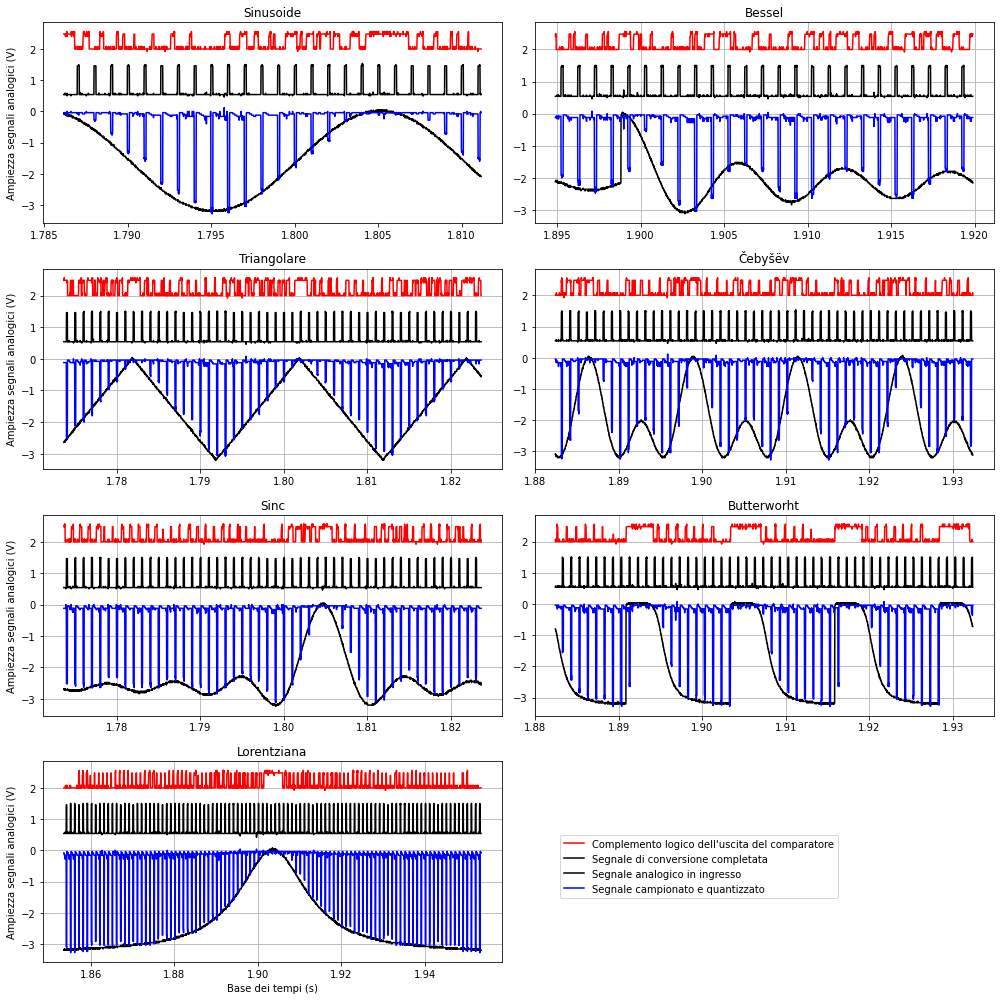

In [4]:
tt = ['Sinusoide', 'Triangolare', 'Sinc', 'Lorentziana', 'Bessel', 'Čebyšëv', 'Butterworht']

fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (14,14))
#fig, ax = plt.subplots()

ax[0][0].plot(dscrT[0], dscrS[0] / 10. + 2., color="red", label="Complemento logico dell'uscita del comparatore")
ax[0][0].plot(conversionCompletedT[0], conversionCompletedS[0] + .5, color="black", label="Segnale di conversione completata")
ax[0][0].plot(signalT[0], signalS[0], color = "black", label="Segnale analogico in ingresso")
ax[0][0].plot(samplingT[0], samplingS[0], color = "blue", label="Segnale campionato e quantizzato")
ax[0][0].set(title = "Sinusoide")
    
for i in range(1, len(dscrT)):
    ib = int(int(i)/4) 
    ia = int(int(i)%4)
    print(ia,'   ',ib)
    ax[ia][ib].plot(dscrT[i], dscrS[i] / 10. + 2., color="red")
    ax[ia][ib].plot(conversionCompletedT[i], conversionCompletedS[i] + .5, color="black")
    ax[ia][ib].plot(signalT[i], signalS[i], color = "black")
    ax[ia][ib].plot(samplingT[i], samplingS[i], color = "blue")
    ax[ia][0].set(ylabel='Ampiezza segnali analogici (V)')
    ax[-1][ib].set(xlabel='Base dei tempi (s)')
    ax[ia][ib].grid()
    ax[ia][ib].set(title = tt[i])
    ax[-1][-1].axis('off')
    
fig.legend(loc = "lower right", bbox_to_anchor=(.84,0.1))
fig.tight_layout()
plt.savefig(f"{OUTPUTDIR}/waveforms.pdf")

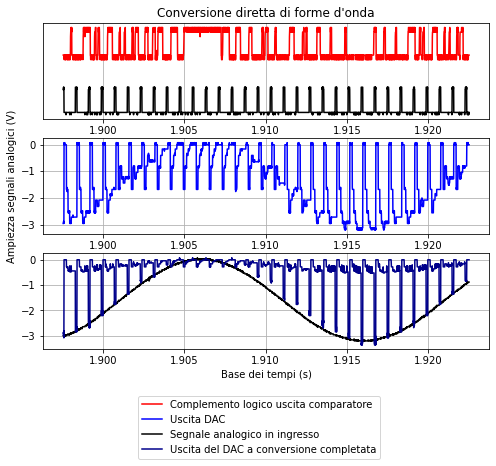

In [5]:
filePrefix = f"{DATADIR}/28-10-21/ALL0036/F00"
ch1_f = openTek(filePrefix + "36CH1.CSV")['Data'].to_numpy().transpose()
ch2_f = openTek(filePrefix + "36CH2.CSV")['Data'].to_numpy().transpose()
ch3_f = openTek(filePrefix + "36CH3.CSV")['Data'].to_numpy().transpose()
ch4_f = openTek(filePrefix + "36CH4.CSV")['Data'].to_numpy().transpose()
chM_f = openTek(filePrefix + "36MTH.CSV")['Data'].to_numpy().transpose()

ch1_t = ch1_f[0]
ch1_s = ch1_f[1]
ch2_t = ch2_f[0]
ch2_s = ch2_f[1]
ch3_t = ch3_f[0]
ch3_s = ch3_f[1]
ch4_t = ch4_f[0]
ch4_s = ch4_f[1]
chM_t = chM_f[0]
chM_s = chM_f[1]

fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (8, 6))
ax[0].axes.yaxis.set_visible(False)
ax[0].set(title = "Conversione diretta di forme d'onda")
ax[1].plot(ch1_t, ch1_s, color = "blue", label = "Uscita DAC") #Campionamento all bits
ax[0].plot(ch2_t, ch2_s, color = "black")
ax[0].plot(ch3_t, ch3_s / 5 + 2, color = "red", label = "Complemento logico uscita comparatore")
ax[2].plot(ch4_t, ch4_s, color = "black", label = "Segnale analogico in ingresso")
ax[2].plot(chM_t, chM_s, color = "darkblue", label = "Uscita del DAC a conversione completata")
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[-1].set(xlabel = "Base dei tempi (s)")
ax[1].set(ylabel = "Ampiezza segnali analogici (V)")
fig.legend(loc = "lower center", bbox_to_anchor = (0.5, -0.14))

#plt.savefig(f"{OUTPUTDIR}/direct_aq_waveforms.pdf")

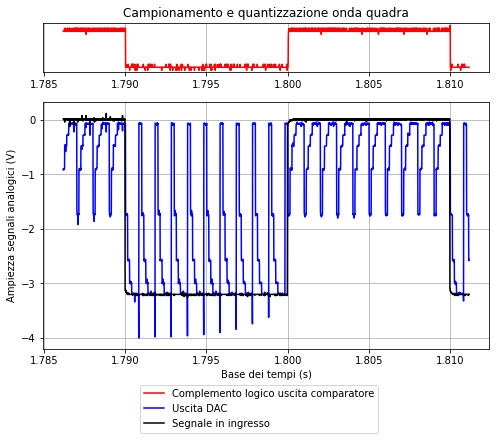

In [6]:
filePrefix = f"{DATADIR}/28-10-21/ALL0028/F00"
ch1_f = openTek(filePrefix + "28CH1.CSV")['Data'].to_numpy().transpose()
ch2_f = openTek(filePrefix + "28CH2.CSV")['Data'].to_numpy().transpose()
ch3_f = openTek(filePrefix + "28CH3.CSV")['Data'].to_numpy().transpose()

ch1_t = ch1_f[0]
ch1_s = ch1_f[1]
ch2_t = ch2_f[0]
ch2_s = ch2_f[1]
ch3_t = ch3_f[0]
ch3_s = ch3_f[1]

gs_kw = dict(height_ratios=[1,5])
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (8, 6), gridspec_kw=gs_kw)
ax[0].axes.yaxis.set_visible(False)
ax[0].set(title = "Campionamento e quantizzazione onda quadra")
ax[1].plot(ch1_t, ch1_s, color = "blue", label = "Uscita DAC") #Campionamento all bits
ax[1].plot(ch2_t, ch2_s, color = "black", label="Segnale in ingresso")
ax[0].plot(ch3_t, ch3_s / 5 + 2, color = "red", label = "Complemento logico uscita comparatore")
ax[0].grid()
ax[1].grid()
ax[-1].set(xlabel = "Base dei tempi (s)")
ax[1].set(ylabel = "Ampiezza segnali analogici (V)")
fig.legend(loc = "lower center", bbox_to_anchor = (0.5, -0.08))

#plt.savefig(f"{OUTPUTDIR}/square_wave_aq.pdf")

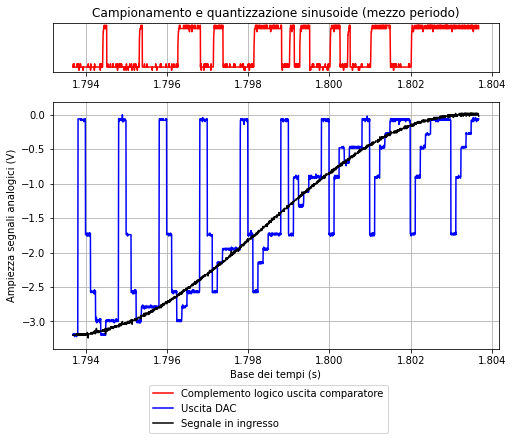

In [7]:
filePrefix = f"{DATADIR}/28-10-21/ALL0027/F00"
ch1_f = openTek(filePrefix + "27CH1.CSV")['Data'].to_numpy().transpose()
ch2_f = openTek(filePrefix + "27CH2.CSV")['Data'].to_numpy().transpose()
ch3_f = openTek(filePrefix + "27CH3.CSV")['Data'].to_numpy().transpose()

ch1_t = ch1_f[0]
ch1_s = ch1_f[1]
ch2_t = ch2_f[0]
ch2_s = ch2_f[1]
ch3_t = ch3_f[0]
ch3_s = ch3_f[1]

gs_kw = dict(height_ratios=[1,5])
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (8, 6), gridspec_kw=gs_kw)
ax[0].axes.yaxis.set_visible(False)
ax[0].set(title = "Campionamento e quantizzazione sinusoide (mezzo periodo)")
ax[1].plot(ch1_t, ch1_s, color = "blue", label = "Uscita DAC") #Campionamento all bits
ax[1].plot(ch2_t, ch2_s, color = "black", label="Segnale in ingresso")
ax[0].plot(ch3_t, ch3_s / 5 + 2, color = "red", label = "Complemento logico uscita comparatore")
ax[0].grid()
ax[1].grid()
ax[-1].set(xlabel = "Base dei tempi (s)")
ax[1].set(ylabel = "Ampiezza segnali analogici (V)")
fig.legend(loc = "lower center", bbox_to_anchor = (0.5, -0.08))

#plt.savefig(f"{OUTPUTDIR}/sine_wave_aq.pdf")

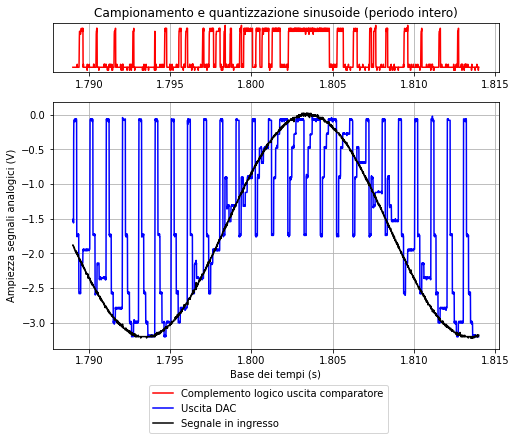

In [8]:
filePrefix = f"{DATADIR}/28-10-21/ALL0026/F00"
ch1_f = openTek(filePrefix + "26CH1.CSV")['Data'].to_numpy().transpose()
ch2_f = openTek(filePrefix + "26CH2.CSV")['Data'].to_numpy().transpose()
ch3_f = openTek(filePrefix + "26CH3.CSV")['Data'].to_numpy().transpose()

ch1_t = ch1_f[0]
ch1_s = ch1_f[1]
ch2_t = ch2_f[0]
ch2_s = ch2_f[1]
ch3_t = ch3_f[0]
ch3_s = ch3_f[1]

gs_kw = dict(height_ratios=[1,5])
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (8, 6), gridspec_kw=gs_kw)
ax[0].axes.yaxis.set_visible(False)
ax[0].set(title = "Campionamento e quantizzazione sinusoide (periodo intero)")
ax[1].plot(ch1_t, ch1_s, color = "blue", label = "Uscita DAC") #Campionamento all bits
ax[1].plot(ch2_t, ch2_s, color = "black", label="Segnale in ingresso")
ax[0].plot(ch3_t, ch3_s / 5 + 2, color = "red", label = "Complemento logico uscita comparatore")
ax[0].grid()
ax[1].grid()
ax[-1].set(xlabel = "Base dei tempi (s)")
ax[1].set(ylabel = "Ampiezza segnali analogici (V)")
fig.legend(loc = "lower center", bbox_to_anchor = (0.5, -0.08))

#plt.savefig(f"{OUTPUTDIR}/sine_wave_aq2.pdf")

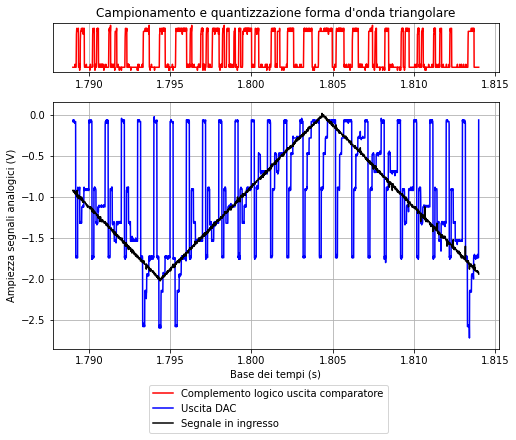

In [9]:
filePrefix = f"{DATADIR}/28-10-21/ALL0025/F00"
ch1_f = openTek(filePrefix + "25CH1.CSV")['Data'].to_numpy().transpose()
ch2_f = openTek(filePrefix + "25CH2.CSV")['Data'].to_numpy().transpose()
ch3_f = openTek(filePrefix + "25CH3.CSV")['Data'].to_numpy().transpose()

ch1_t = ch1_f[0]
ch1_s = ch1_f[1]
ch2_t = ch2_f[0]
ch2_s = ch2_f[1]
ch3_t = ch3_f[0]
ch3_s = ch3_f[1]

gs_kw = dict(height_ratios=[1,5])
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (8, 6), gridspec_kw=gs_kw)
ax[0].axes.yaxis.set_visible(False)
ax[0].set(title = "Campionamento e quantizzazione forma d'onda triangolare")
ax[1].plot(ch1_t, ch1_s, color = "blue", label = "Uscita DAC") #Campionamento all bits
ax[1].plot(ch2_t, ch2_s, color = "black", label="Segnale in ingresso")
ax[0].plot(ch3_t, ch3_s / 5 + 2, color = "red", label = "Complemento logico uscita comparatore")
ax[0].grid()
ax[1].grid()
ax[-1].set(xlabel = "Base dei tempi (s)")
ax[1].set(ylabel = "Ampiezza segnali analogici (V)")
fig.legend(loc = "lower center", bbox_to_anchor = (0.5, -0.08))

#plt.savefig(f"{OUTPUTDIR}/triangle_wave_aq.pdf")

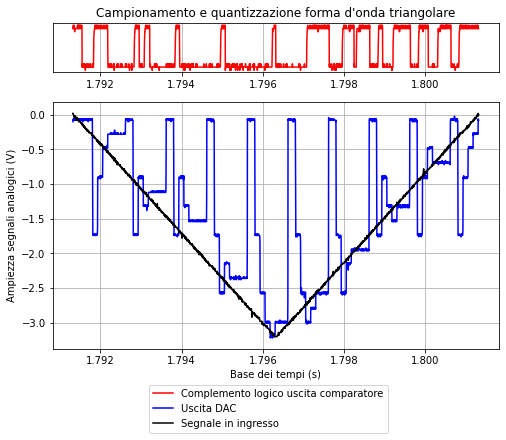

In [10]:
filePrefix = f"{DATADIR}/28-10-21/ALL0024/F00"
ch1_f = openTek(filePrefix + "24CH1.CSV")['Data'].to_numpy().transpose()
ch2_f = openTek(filePrefix + "24CH2.CSV")['Data'].to_numpy().transpose()
ch3_f = openTek(filePrefix + "24CH3.CSV")['Data'].to_numpy().transpose()

ch1_t = ch1_f[0]
ch1_s = ch1_f[1]
ch2_t = ch2_f[0]
ch2_s = ch2_f[1]
ch3_t = ch3_f[0]
ch3_s = ch3_f[1]

gs_kw = dict(height_ratios=[1,5])
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (8, 6), gridspec_kw=gs_kw)
ax[0].axes.yaxis.set_visible(False)
ax[0].set(title = "Campionamento e quantizzazione forma d'onda triangolare")
ax[1].plot(ch1_t, ch1_s, color = "blue", label = "Uscita DAC") #Campionamento all bits
ax[1].plot(ch2_t, ch2_s, color = "black", label="Segnale in ingresso")
ax[0].plot(ch3_t, ch3_s / 5 + 2, color = "red", label = "Complemento logico uscita comparatore")
ax[0].grid()
ax[1].grid()
ax[-1].set(xlabel = "Base dei tempi (s)")
ax[1].set(ylabel = "Ampiezza segnali analogici (V)")
fig.legend(loc = "lower center", bbox_to_anchor = (0.5, -0.08))

plt.savefig(f"{OUTPUTDIR}/triangle_wave_aq2.pdf")

In [13]:
analogT  = []
dacT     = []
bitT     = []
analogS  = []
dacS     = []
bitS     = []

tt      = ['1111->1110', '1110->1101', '1101->1100', '1100->1011', '1011->1010', '1010->1001', '1001->1000',
           '1000->0111', '0111->0110', '0110->0101', '0101->0100', '0100->0011', '0011->0010', '0010->0001',
           '0001->0000']
# '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22'
for s in ['08', '23', '09', '10', '11', '12', '13', '14', '16', '17', '18', '19', '20', '21','22']:
    filePrefix = f"{DATADIR}/28-10-21/ALL00" + s + "/F00" + s
    ch1_file = filePrefix + "CH1.CSV"
    ch2_file = filePrefix + "CH2.CSV"
    ch3_file = filePrefix + "CH3.CSV"

    ch1      = openTek(ch1_file)['Data'].to_numpy().transpose()
    ch2      = openTek(ch2_file)['Data'].to_numpy().transpose()
    ch3      = openTek(ch3_file)['Data'].to_numpy().transpose()

    ch1t     = ch1[0]
    ch2t     = ch2[0]
    ch3t     = ch3[0]

    ch1s     = ch1[1]
    ch2s     = ch2[1]
    ch3s     = ch3[1]

    analogT.append(ch2t)
    analogS.append(ch2s)
    dacT.append(ch1t)
    dacS.append(ch1s)
    bitT.append(ch3t)
    bitS.append(ch3s)

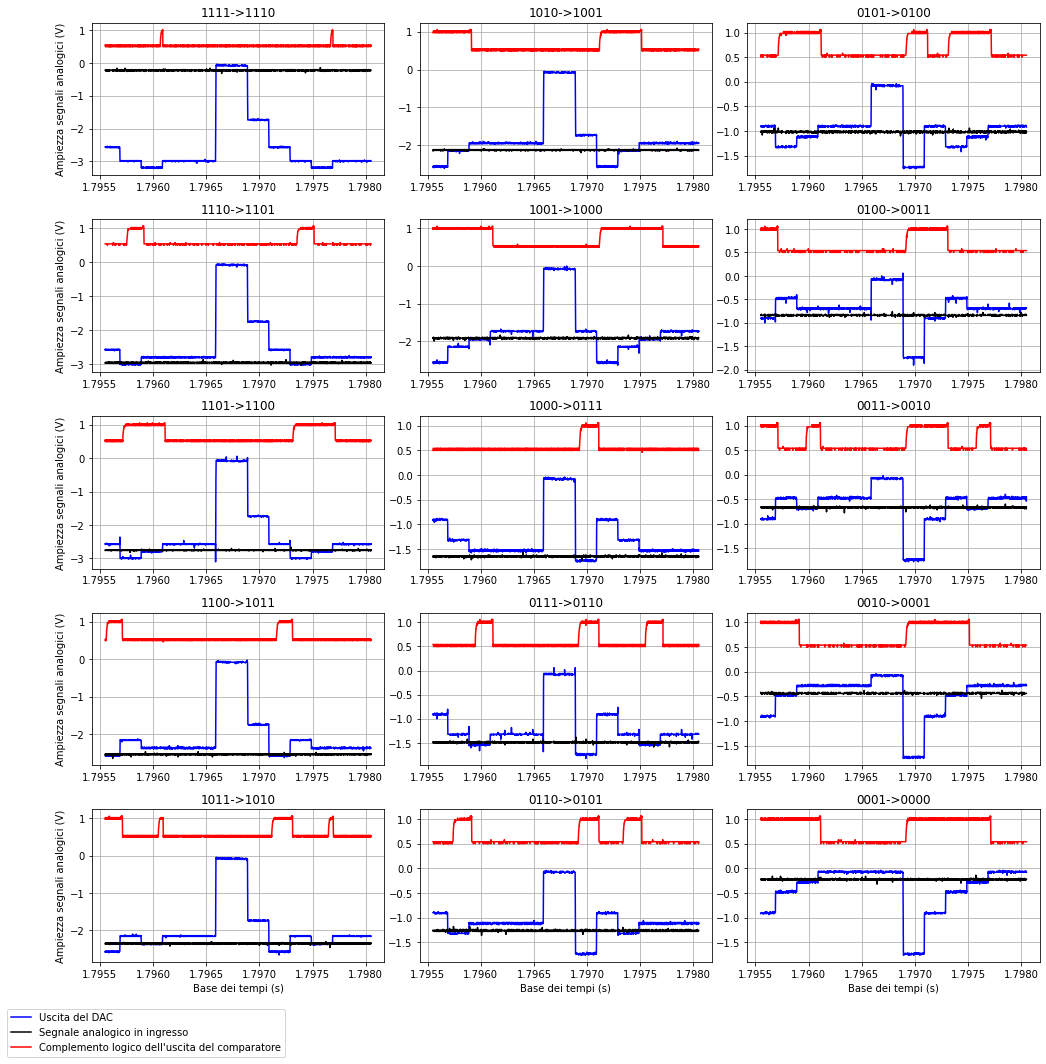

In [15]:
fig, ax = plt.subplots(nrows = 5, ncols = 3, figsize = (14,14))
#fig, ax = plt.subplots()

ax[0][0].plot(dacT[0], dacS[0], color = "blue", label = "Uscita del DAC")
ax[0][0].plot(analogT[0], analogS[i], color = "black", label = "Segnale analogico in ingresso")
ax[0][0].plot(bitT[0], bitS[0] / 10 + 0.5, color = "red", label = "Complemento logico dell'uscita del comparatore")
ax[0][0].set(ylabel='Ampiezza segnali analogici (V)', title = tt[0])
ax[0][0].grid()

for i in range(1, len(bitS)):
    ib = int(int(i)/5) 
    ia = int(int(i)%5)
    
    ax[ia][ib].plot(dacT[i], dacS[i], color = "blue")
    ax[ia][ib].plot(analogT[i], analogS[i], color = "black")
    ax[ia][ib].plot(bitT[i], bitS[i] / 10 + 0.5, color = "red")
    ax[ia][ib].set(title = tt[i])

    ax[ia][0].set(ylabel='Ampiezza segnali analogici (V)')
    ax[-1][ib].set(xlabel='Base dei tempi (s)')
    ax[ia][ib].grid()
    
fig.legend(loc = "upper center", bbox_to_anchor = (0.1, 0.))
fig.tight_layout()
#plt.savefig(f"{OUTPUTDIR}/calibration.pdf")